# Imports needed for the exercises:

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize

## Exercise 1: Program a 1-qubit quantum circuit outputting a superposition state $\frac{\lvert 0 \rangle + \lvert 1 \rangle}{\sqrt{2}}$.
Visualize the circuit and the final quantum state in the Bloch sphere.
*Tips: use 'QuantumCircuit', 'Statevector' and 'evolve'.*

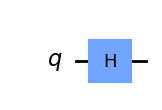

In [2]:
# define your circuit using 'QuantumCircuit'
qc = QuantumCircuit(1)

# add a H gate on qubit '0', putting this qubit in superposition
qc.h(0)

# plot the circuit
qc.draw('mpl')

In [3]:
# define your initial state using 'Statevector'
state = Statevector.from_int(0, 2**1)

state.draw('latex')

<IPython.core.display.Latex object>

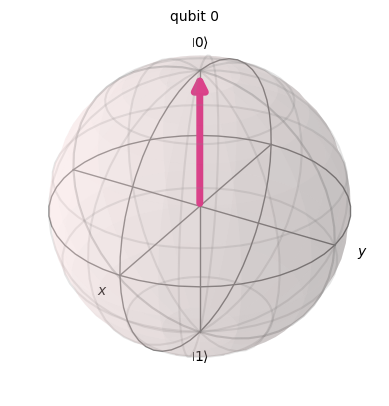

In [4]:
# plot the intial state in the Bloch sphere
plot_bloch_multivector(state)

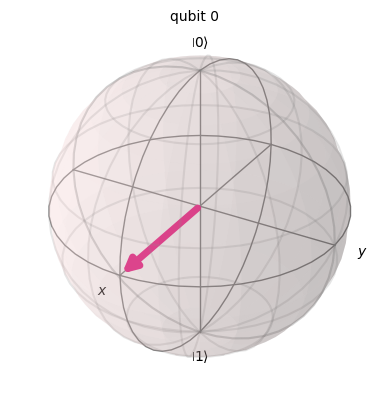

In [5]:
# obtain the state after the quantum circuit using evolve
finalstate = state.evolve(qc)

# plot the final state in the Bloch sphere
plot_bloch_multivector(finalstate)

In [6]:
finalstate.draw('latex')

<IPython.core.display.Latex object>

### Comment the results of the exercise here:

1. The Hadamard $H$ gate placed on the single-qubit register transformed the single-qubit input state from $\lvert 0 \rangle$ into $\frac{\lvert 0 \rangle + \lvert 1 \rangle}{\sqrt{2}}$.
2. Visually, this is a transformation of the single-qubit state from the positive $z$-axis to the positve $x$-axis on the Bloch sphere.
3. Given that the mathematical representation of a qubit on the Bloch sphere is $\ket{\psi} = \cos{ \left( \frac{\theta}{2} \right ) } \ket{0} + e^{i\phi} \sin{  \left( \frac{\theta}{2} \right) \ket{1} }$, the final state then has $\theta = \frac{\pi}{2}$ and $\phi = 0$, which is what we observe on the Bloch sphere visualization.

## Exercise 2: Program a 2-qubit quantum circuit generating the entangled state $\frac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt{2}}$.

Visualize the circuit and the state. Is it possible to visualize the initial state for each qubit in the Bloch sphere? If not, use the ‘qsphere’ representation.

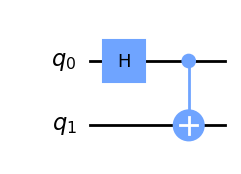

In [7]:
# define the quantum circuit
qc = QuantumCircuit(2)

# add the H and CX gates
qc.h(0)
qc.cx(0,1)

# plot the circuit
qc.draw('mpl')

In [8]:
# define your initial state using 'Statevector'
state = Statevector.from_int(0, 2**2)

state.draw('latex')

<IPython.core.display.Latex object>

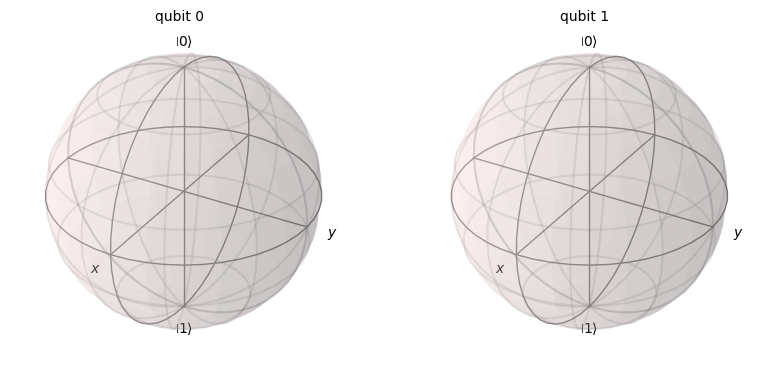

In [9]:
# obtain the state after the quantum circuit using evolve
finalstate = state.evolve(qc)

# plot the final state in the Bloch sphere
plot_bloch_multivector(finalstate)

In [10]:
# the final state
finalstate.draw('latex')

<IPython.core.display.Latex object>

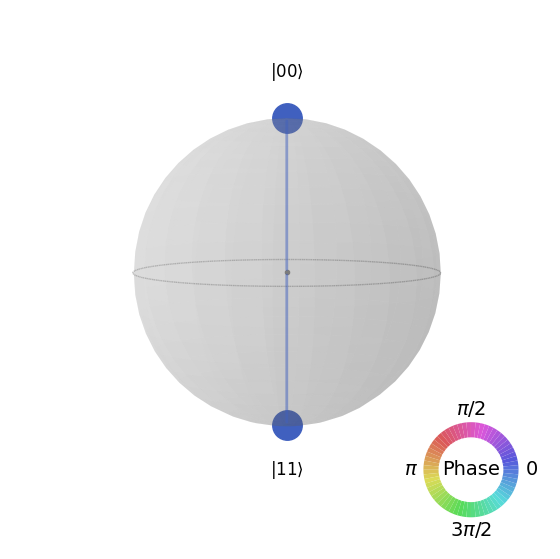

In [11]:
# plot in the IBM qsphere
finalstate.draw('qsphere')

### Comment the results of the exercise here:

1. The $H$ gate placed on the qubit-0 register transformed the input state from from $\lvert 00 \rangle$ into $\frac{\lvert 0 \rangle + \lvert 1 \rangle}{\sqrt{2}} \otimes \lvert 1 \rangle = \frac{\lvert 00 \rangle + \lvert 10 \rangle}{\sqrt{2}}$. Then the controlled-$x$ (cx) gate placed on qubit-1 register transformed the input state to its final entangled state $\frac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt{2}}$.
2. Since the qubits in the final state are entangled, there is no way to visualize them on two distinct Bloch spheres.
3. The "qsphere" visualization shows two blue points. According to Qiskit documentation, the size of the points is proportional to the probability of their corresponding entangled term in the state, while the color represents the phase.
4. We see that the points are equal in size and color of blue, which correspond with their equal probability amplitude and the equal phase of $0$.

## Exercise 3: Program a quantum circuit including a 3-qubit quantum register and a 3-bit classical register so that the final state is $\ket{100}$.

1. Include a measurement for all qubits and send the results through classical registers.
2. Visualize the final state both in the Bloch sphere and in the qsphere.
3. Compile the circuit and plot the result of the measurements in a histogram.

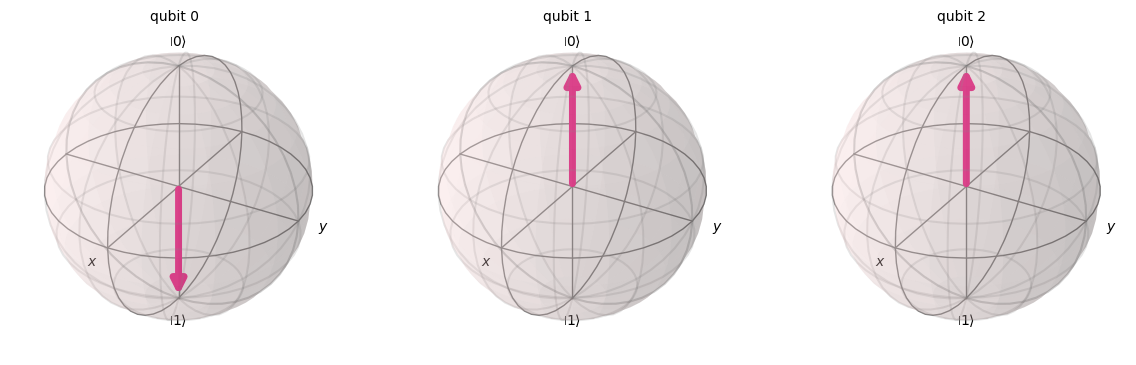

In [12]:
# define the circuit
qc = QuantumCircuit(3, 3)

# alternatively, define quantum  & classical registers separately (convenient for large # of qbits)
# qr = QuantumRegister(3)
# cr = ClassicalRegister(3)
# qc = QuantumCircuit(qr, cr)

# define the initial state
state = Statevector.from_int(0, 2**3)

# add the gates
qc.x(0)

# evolve the state through the circuit
finalstate = state.evolve(qc)

# plot the state in the Bloch sphere
plot_bloch_multivector(finalstate)

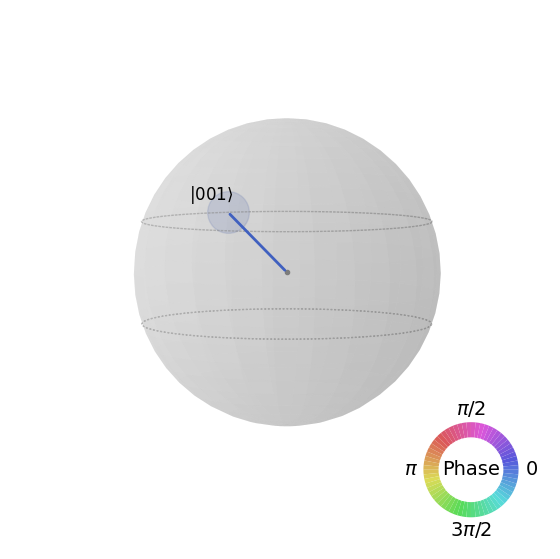

In [13]:
# plot the state in IBM qsphere
finalstate.draw('qsphere')

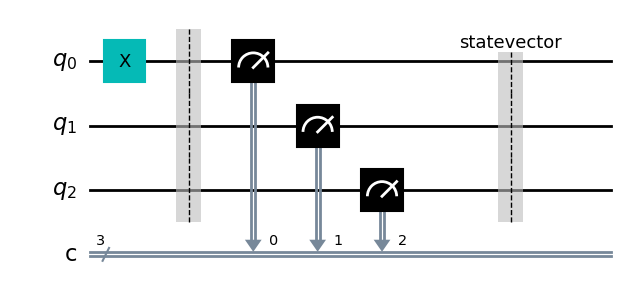

In [14]:
# measure the three qubits and store the result of the measurement in the three classical bits
qc.barrier(range(3))
qc.measure(range(3), range(3)) # equivalent to qc.measure([0,1,2], [0,1,2])

# alternatively
# qc.measure(0,0)
# qc.measure(1,1)
# qc.measure(2,2)

# save state vector
qc.save_statevector()

# plot the circuit
qc.draw('mpl')

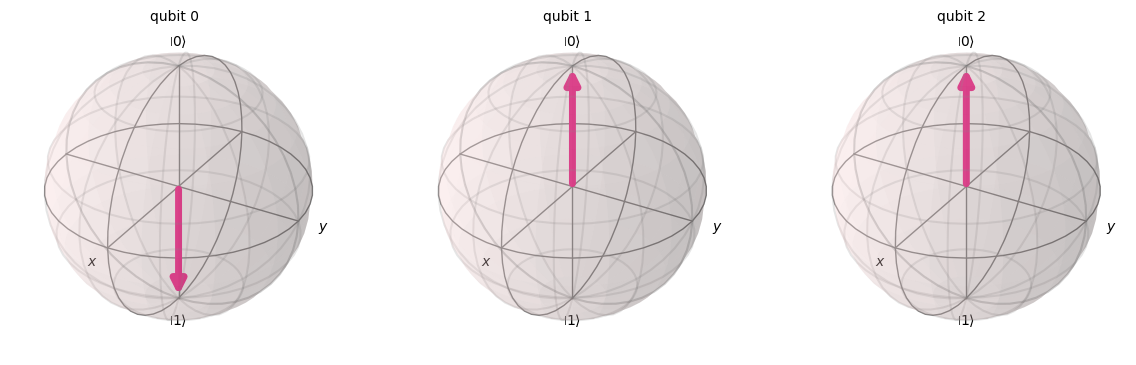

In [15]:
# run the simulations
sim = AerSimulator()
compiled_circuit = transpile(qc, sim)
job = sim.run(compiled_circuit)

# plot the out_vector
out_vector = job.result().get_statevector()
plot_bloch_multivector(out_vector)

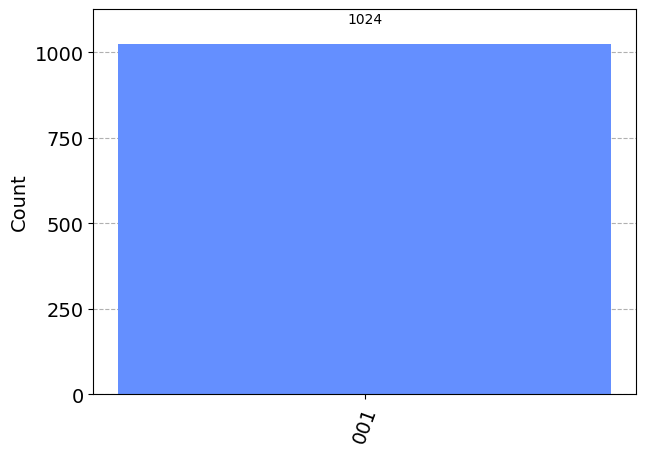

In [16]:
# get counts from result
result = job.result()
counts = result.get_counts()

# plot the histogram
plot_histogram(counts)

### Comment the results of the exercise here:

1. We simulated the evolution and measurement through a 3-qubit register quantum circuit, where there is an $x$-gate placed on the qubit-0 register and the remaining registers are untouched. 3 classical registers connected to the quantum registers via 3 meausrement devices.
2. By default, the measurement count is $2^{10} = 1024$.
3. The default input state is $\ket{000}$, which means the state right before measurement is $\ket{100}$, such that we expect to measure $\ket{100}$ with $100\%$ probability as the result of measurements.
3. The resulting measurement histogram shows $100\%$ measurement probability of $\ket{100}$, which is what we expected, as the state right before measurement is not in a superposition.

## Exercise 4: Program a quantum circuit with a 1-qubit quantum register and also one classical register. 
1. Generate a random superposition state $\ket{\psi}$ and visualize it in the Bloch sphere. 
2. Initialize your quantum circuit with the random state. 
3. Run the simulation and visualize the output state in the Bloch sphere, and the count’s histogram. 
4. Repeat the simulation several times to verify the randomness of the initial gate.

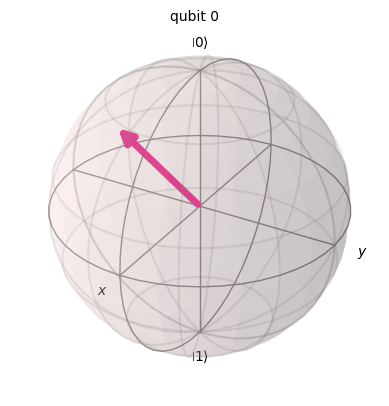

In [17]:
# create random 1-qubit state psi using random_statevector
psi = random_statevector(2**1)

# show it in the Bloch sphere
plot_bloch_multivector(psi)

In [18]:
# mathematical representation of psi
psi.draw('latex')

<IPython.core.display.Latex object>

In [19]:
# probabilities for each bit * measurement count
psi.probabilities()*2**10

array([910.58482794, 113.41517206])

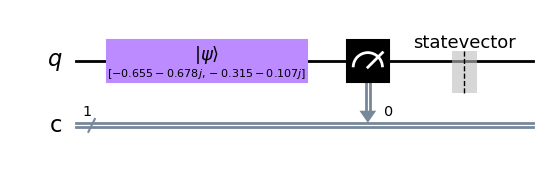

In [20]:
# define the quantum circuit
qc = QuantumCircuit(1, 1)

# initialize the circuit with the random state
init_gate = Initialize(psi)
qc.append(init_gate, [0])

# measure the state and store the result in the classical bit
qc.measure(0,0)

# save state vector
qc.save_statevector()

# show the circuit including the measurement
qc.draw('mpl')

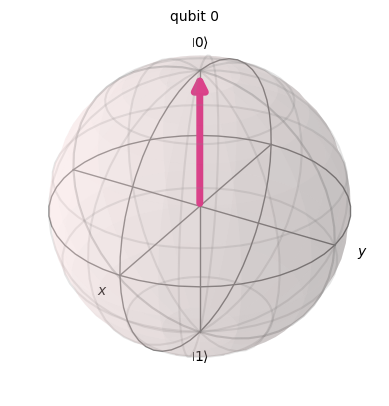

In [21]:
# run the simulation (see previous exercise)
sim = AerSimulator()
compiled_circuit = transpile(qc, sim)
job = sim.run(compiled_circuit)

# display the out_vecor
out_vector = job.result().get_statevector()
plot_bloch_multivector(out_vector)


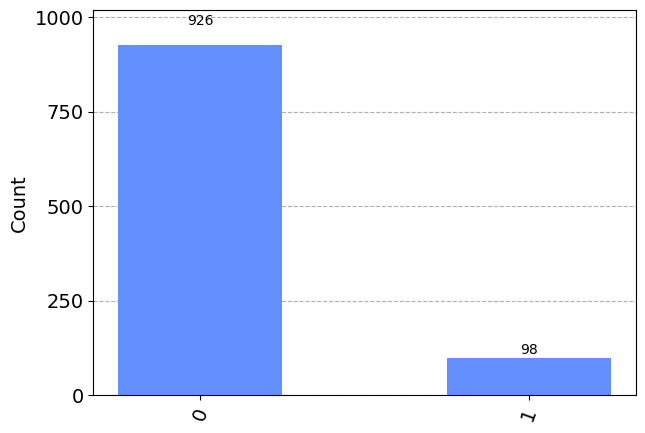

In [22]:
# get the counts histogram
result = job.result()
counts = result.get_counts()

# plot the histogram
plot_histogram(counts)

### Comment the results of the exercise here:
1. Using a single-qubit state in random superposition, we initialized a random quantum gate and added it onto a circuit with a single-qubit register, then conducted simulated measurements of the circuit with $\ket{0}$ as the input state.
2. The Bloch sphere visualization of the random qubit show that it's in a random superposition state according to the result of the random state vector generator.
3. The input $\ket{0}$ state is put into a superposition according to the random quantum gate. After measurement, the state is expected to "randomly" collapse onto either $\ket{0}$ or $\ket{1}$ with probabilities matching the probability amplitudes of the random qubit gate.
4. The result of the measurements confirms this expectation. That is, the counts of measuring $\ket{0}$ and $\ket{1}$ correspond to the probabilities of the qubit used to defined the random quantum gate. This means that the randomness of the initial gate is verified.

## Exercise 5.1

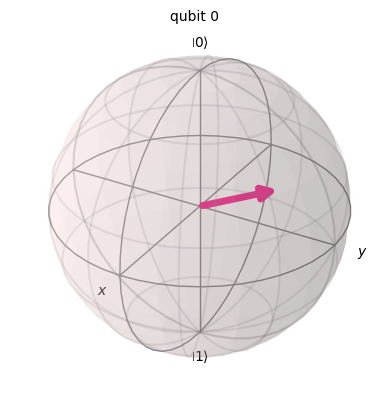

In [23]:
# define a random quantum state and show it in the Bloch sphere
psi = random_statevector(2**1)
plot_bloch_multivector(psi)

In [24]:
psi.draw('latex')

<IPython.core.display.Latex object>

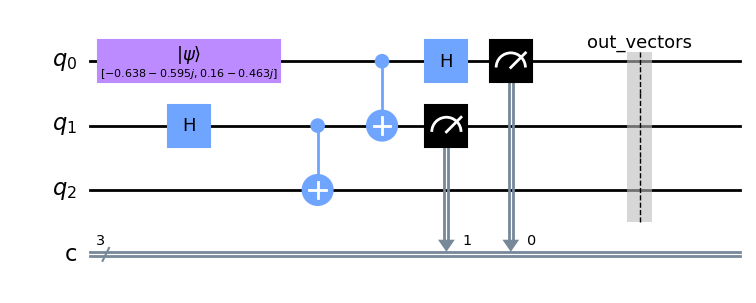

In [25]:
# define the circuit displayed in the exercise sheet (including all gates) and show it

# base circuit
teleportation_circuit = QuantumCircuit(3, 3)

# initialize a superposition gate from the qubit and add it to the register-0
init_gate = Initialize(psi)
teleportation_circuit.append(init_gate, [0])

# add an H-gate to register-1
teleportation_circuit.h(1)

# add cx gate from register-1 to 2, and from register-0 to 1
teleportation_circuit.cx(1,2)
teleportation_circuit.cx(0,1)

# add an H-gate to register-0
teleportation_circuit.h(0)

# add measurements
teleportation_circuit.measure(1,1)
teleportation_circuit.measure(0,0)

# save statevector
# teleportation_circuit.save_statevector()
teleportation_circuit.save_statevector(label='out_vectors', pershot=True)

# show the circuit including the measurement
teleportation_circuit.draw('mpl')

In [26]:
# run the simulation
sim = AerSimulator()
compiled_circuit = transpile(teleportation_circuit, sim)
job = sim.run(compiled_circuit)

# get out_vector for each run
out_vectors = job.result().data(0)['out_vectors']
out_vector = out_vectors[0]
# out_vector = job.result().get_statevector()

print([print(ov.to_dict()) for ov in out_vectors])

{'010': (0.15984588608026415-0.4626771047585005j), '110': (-0.6376114707355485-0.5948367858681552j)}
{'011': (-0.1598458860802642+0.46267710475850066j), '111': (-0.6376114707355484-0.5948367858681552j)}
{'001': (-0.6376114707355485-0.5948367858681552j), '101': (-0.15984588608026415+0.4626771047585005j)}
{'011': (-0.1598458860802642+0.46267710475850066j), '111': (-0.6376114707355484-0.5948367858681552j)}
{'011': (-0.1598458860802642+0.46267710475850066j), '111': (-0.6376114707355484-0.5948367858681552j)}
{'011': (-0.1598458860802642+0.46267710475850066j), '111': (-0.6376114707355484-0.5948367858681552j)}
{'001': (-0.6376114707355485-0.5948367858681552j), '101': (-0.15984588608026415+0.4626771047585005j)}
{'000': (-0.6376114707355485-0.5948367858681552j), '100': (0.1598458860802641-0.4626771047585003j)}
{'011': (-0.1598458860802642+0.46267710475850066j), '111': (-0.6376114707355484-0.5948367858681552j)}
{'010': (0.15984588608026415-0.4626771047585005j), '110': (-0.6376114707355485-0.5948

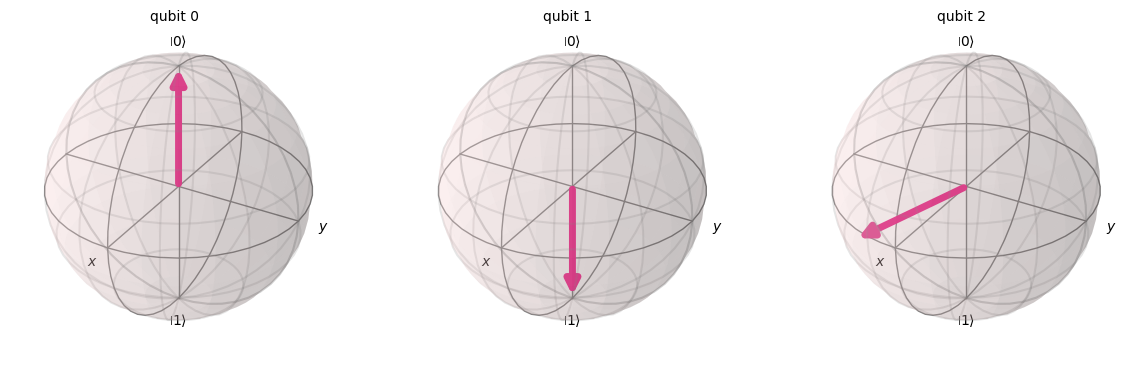

In [27]:
# plot the out_vector
plot_bloch_multivector(out_vector)

In [28]:
out_vector.draw('latex')

<IPython.core.display.Latex object>

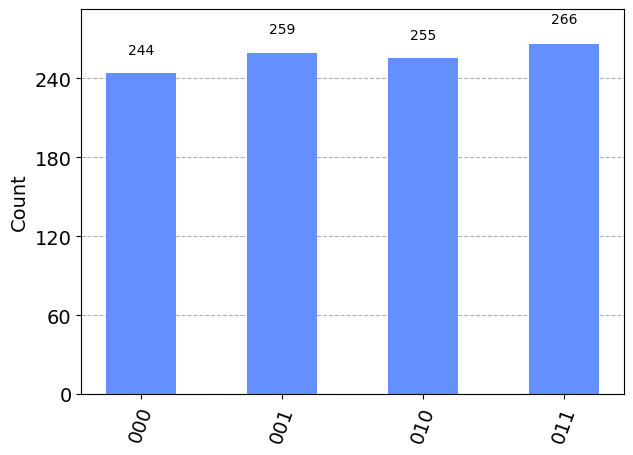

In [29]:
# results histogram
counts = job.result().get_counts()
plot_histogram(counts)

### Is teleportation achieved every time?
1. The results show that teleportation from qubit register-0 to register-2 is not achieved with $100\%$ probability.
2. Carrying out the circuit logic show that the circuit transforms $\ket{000}$ to $\frac{1}{2} [\ket{00} \otimes (a\ket{0} + b\ket{1}) + \ket{01} \otimes (a\ket{1} + b\ket{0}) + \ket{10} \otimes (a\ket{0} - b\ket{1})+ \ket{11} \otimes (a\ket{1} - b\ket{0})]$, where $a$ and $b$ are the complex probability amplitudes of $\ket{0}$ and $\ket{1}$ of the generated superposition qubit.
3. Therefore, we expect a $25\%$ chance of quantum teleportation, which occurs when we measure $\ket{00}$ on registers 0 and 1.
4. A rough glance at the list of out-vectors supports the assertion of $25\%$ teleportation probability.

## Exercise 5.2

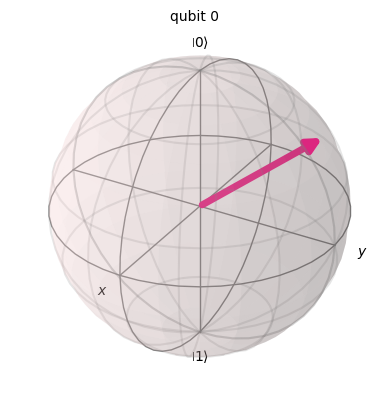

In [107]:
# define a random quantum state and show it in the Bloch sphere
psi = random_statevector(2**1)
plot_bloch_multivector(psi)

In [108]:
psi.draw('latex')

<IPython.core.display.Latex object>

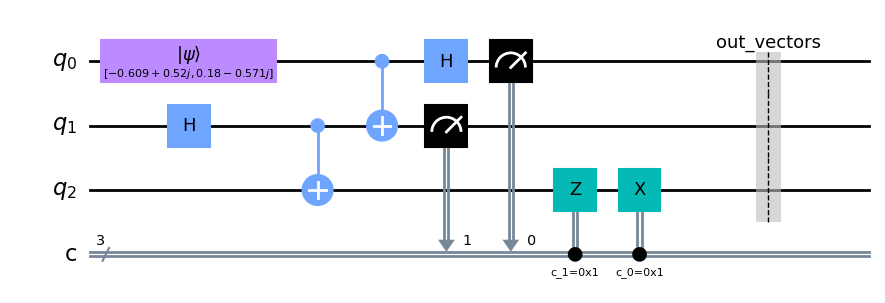

In [109]:
# define the circuit displayed in the exercise sheet (including all gates) and show it

# base circuit
teleportation_circuit = QuantumCircuit(3, 3)

# initialize a superposition gate from the qubit and add it to the register-0
init_gate = Initialize(psi)
teleportation_circuit.append(init_gate, [0])

# add an H-gate to register-1
teleportation_circuit.h(1)

# add cx gate from register-1 to 2, and from register-0 to 1
teleportation_circuit.cx(1,2)
teleportation_circuit.cx(0,1)

# add an H-gate to register-0
teleportation_circuit.h(0)

# add measurements
teleportation_circuit.measure(1,1)
teleportation_circuit.measure(0,0)

# include the conditional gates
teleportation_circuit.z(2).c_if(1, 1)
teleportation_circuit.x(2).c_if(0, 1)

# save state vector
# teleportation_circuit.save_statevector()
teleportation_circuit.save_statevector(label='out_vectors', pershot=True)

# show the circuit including the gates
teleportation_circuit.draw('mpl')

In [110]:
# run the simulation
sim = AerSimulator()
compiled_circuit = transpile(teleportation_circuit, sim)
job = sim.run(compiled_circuit)

# get out_vector for each run
out_vectors = job.result().data(0)['out_vectors']
out_vector = out_vectors[0]
# out_vector = job.result().get_statevector()

print([print(ov.to_dict()) for ov in out_vectors])

{'000': (-0.6093440907609662+0.5203383962448902j), '100': (0.17964699028070413-0.5706791491995055j)}
{'001': (-0.17964699028070416+0.5706791491995057j), '101': (-0.6093440907609662+0.5203383962448902j)}
{'000': (-0.6093440907609662+0.5203383962448902j), '100': (0.17964699028070413-0.5706791491995055j)}
{'010': (0.17964699028070416-0.5706791491995057j), '110': (0.6093440907609662-0.5203383962448902j)}
{'001': (-0.17964699028070416+0.5706791491995057j), '101': (-0.6093440907609662+0.5203383962448902j)}
{'001': (-0.17964699028070416+0.5706791491995057j), '101': (-0.6093440907609662+0.5203383962448902j)}
{'001': (-0.17964699028070416+0.5706791491995057j), '101': (-0.6093440907609662+0.5203383962448902j)}
{'001': (-0.17964699028070416+0.5706791491995057j), '101': (-0.6093440907609662+0.5203383962448902j)}
{'000': (-0.6093440907609662+0.5203383962448902j), '100': (0.17964699028070413-0.5706791491995055j)}
{'011': (0.6093440907609661-0.5203383962448901j), '111': (-0.17964699028070416+0.570679

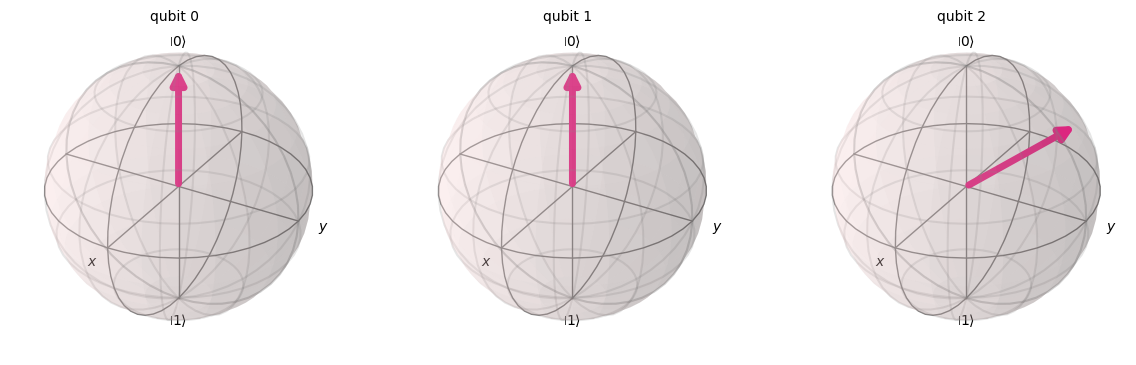

In [111]:
# plot the out_vector
plot_bloch_multivector(out_vector)

In [112]:
out_vector.draw('latex')

<IPython.core.display.Latex object>

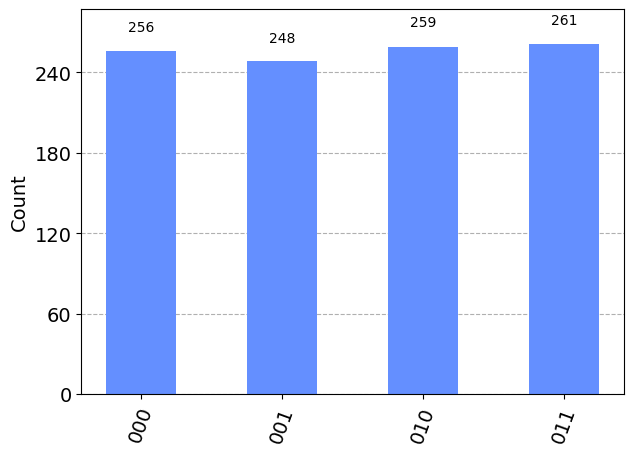

In [106]:
# show the histogram
counts = job.result().get_counts()
plot_histogram(counts)

### Is teleportation achieved now? Comment the results.
1. Again, the results show that teleportation from qubit register-0 to register-2 is not achieved with $100\%$ probability.
2. Carrying out the circuit logic show that the circuit (with added cx and cx gates) transforms $\ket{000}$ to $\frac{1}{2} [(\ket{00} - \ket{11} \otimes (a\ket{0} + b\ket{1}) + (\ket{10} - \ket{01}) \otimes (a\ket{1} - b\ket{0})]$, where $a$ and $b$ are the complex probability amplitudes of $\ket{0}$ and $\ket{1}$ of the generated superposition qubit.
3. Therefore, we expect a $50\%$ chance of quantum teleportation, which occurs when we measure $\ket{00}$ and $\ket{11}$ on registers 0 and 1 respectively.
4. A rough glance at the list of out-vectors supports the assertion of $50\%$ teleportation probability.